In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [2]:
# Load Global Superstore dataset for General EDA
global_df = pd.read_csv("global_superstore.csv")

# Load Sales data for Sales Performance Analysis
sales_df = pd.read_csv("sales_data.csv")

# Show shapes of both datasets
print("Global Superstore shape:", global_df.shape)
print("Sales Data shape:", sales_df.shape)


Global Superstore shape: (2, 5)
Sales Data shape: (3, 7)


In [3]:
# Preview the datasets
print("Global Superstore Data:")
display(global_df.head())

print("\nSales Data:")
display(sales_df.head())


Global Superstore Data:


,Order ID,Sales,Profit,Region,Category
0,CA-2016-152156,261.96,41.91,West,Furniture
1,CA-2016-152157,731.94,219.58,Central,Technology



Sales Data:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Printer,West,200,20,0.10,Technology,2023-01-10
1,Chair,East,150,15,0.05,Furniture,2023-01-11
2,Phone,South,400,50,0.20,Technology,2023-01-12


In [4]:
# Check missing values in Global Superstore dataset
print("Missing values in Global Superstore:")
display(global_df.isnull().sum())

# Check missing values in Sales dataset
print("\nMissing values in Sales Data:")
display(sales_df.isnull().sum())


Missing values in Global Superstore:


Order ID    0
Sales       0
Profit      0
Region      0
Category    0
dtype: int64


Missing values in Sales Data:


Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

In [5]:
# Fill or drop missing values from Global Superstore
global_df = global_df.dropna()  # or use fillna() if needed

# Fill or drop missing values from Sales data
sales_df = sales_df.dropna()  # or use fillna()


In [6]:
global_df['Column'] = global_df['Column'].fillna(global_df['Column'].mean())


KeyError: 'Column'

In [7]:
# Show column names of both datasets
print("Global Superstore Columns:\n", global_df.columns.tolist())
print("\nSales Data Columns:\n", sales_df.columns.tolist())


Global Superstore Columns:
 ['Order ID', 'Sales', 'Profit', 'Region', 'Category']

Sales Data Columns:
 ['Product', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Date']


In [8]:
# Example: If 'Profit' column has missing values
global_df['Profit'] = global_df['Profit'].fillna(global_df['Profit'].mean())


In [9]:
global_df = global_df.dropna()
sales_df = sales_df.dropna()


In [10]:
# Dataset Info
print("📄 GLOBAL SUPERSTORE INFO")
print(global_df.info())
print("\n🧾 SALES DATA INFO")
print(sales_df.info())


📄 GLOBAL SUPERSTORE INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  2 non-null      object 
 1   Sales     2 non-null      float64
 2   Profit    2 non-null      float64
 3   Region    2 non-null      object 
 4   Category  2 non-null      object 
dtypes: float64(2), object(3)
memory usage: 212.0+ bytes
None

🧾 SALES DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   3 non-null      object 
 1   Region    3 non-null      object 
 2   Sales     3 non-null      int64  
 3   Profit    3 non-null      int64  
 4   Discount  3 non-null      float64
 5   Category  3 non-null      object 
 6   Date      3 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 300.0+ bytes
Non

In [11]:
# Descriptive statistics
print("📊 GLOBAL SUPERSTORE STATS")
display(global_df.describe())

print("📊 SALES DATA STATS")
display(sales_df.describe())


📊 GLOBAL SUPERSTORE STATS


,Sales,Profit
count,2.000000,2.000000
mean,496.950000,130.745000
std,332.326045,125.631662
min,261.960000,41.910000
25%,379.455000,86.327500
50%,496.950000,130.745000
75%,614.445000,175.162500
max,731.940000,219.580000


📊 SALES DATA STATS


,Sales,Profit,Discount
count,3.000000,3.000000,3.000000
mean,250.000000,28.333333,0.116667
std,132.287566,18.929694,0.076376
min,150.000000,15.000000,0.050000
25%,175.000000,17.500000,0.075000
50%,200.000000,20.000000,0.100000
75%,300.000000,35.000000,0.150000
max,400.000000,50.000000,0.200000


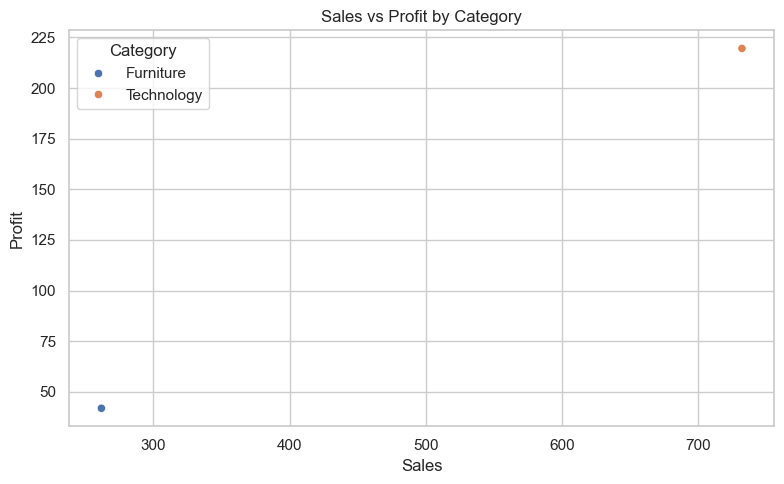

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Sales vs Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(data=global_df, x='Sales', y='Profit', hue='Category')
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Ayush  Patil\AppData\Local\Temp\ipykernel_17544\2118204390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")


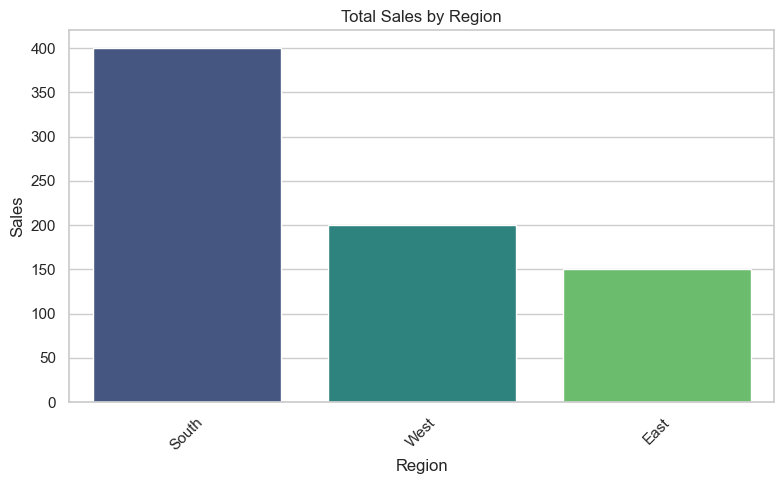

In [13]:
# Total Sales by Region
plt.figure(figsize=(8, 5))
sales_by_region = sales_df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Feature matrix (X) and target (y)
X = sales_df[['Profit', 'Discount']]
y = sales_df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: nan
Mean Squared Error: 204.05664428933284


D:\ayush\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
